<a href="https://colab.research.google.com/github/GRTO/DiplomadoPucp/blob/master/TimeUse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd gdrive/My\ Drive/'Colab Notebooks'/'Data mining'/'Clase 2/'
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/Data mining/Clase 2
 cars.csv     film.ipynb		  'MetalsInRivers GB.xlsx'
 cars.ipynb   FullSwainsoniDataset.ipynb   TimeUse.csv
 film.csv     FullSwainsoniDataset.txt	   TimeUse.ipynb


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

# Lectura de los datos

In [0]:
df = pd.read_csv('TimeUse.csv', encoding = "ISO-8859-1");
df

,SEX,GEO/ACL00,Total,Personal care,Sleep,Eating,Other and/or unspecified personal care,"Employment, related activities and travel as part of/during main and second job",Main and second job and related travel,Activities related to employment and unspecified employment,Study,School and university except homework,Homework,Free time study,Household and family care,Food management except dish washing,Dish washing,Cleaning dwelling,Household upkeep except cleaning dwelling,Laundry,Ironing,Handicraft and producing textiles and other care for textiles,Gardening; other pet care,Tending domestic animals,Caring for pets,Walking the dog,Construction and repairs,Shopping and services,"Childcare, except teaching, reading and talking","Teaching, reading and talking with child",Household management and help family member,"Leisure, social and associative life",Organisational work,Informal help to other households,Participatory activities,Visiting and feasts,Other social life,Entertainment and culture,Resting,Walking and hiking,Sports and outdoor activities except walking and hiking,Computer games,Computing,Hobbies and games except computing and computer games,Reading books,"Reading, except books",TV and video,Radio and music,Unspecified leisure,Travel except travel related to jobs,Travel to/from work,Travel related to study,Travel related to shopping and services,Transporting a child,Travel related to other household purposes,"Travel related to leisure, social and associative life",Unspecified travel,Unspecified time use
0,Males,Belgium,24:00,10:45,8:15,1:49,0:42,3:07,3:05,0:02,0:11,0:05,0:03,0:03,2:28,0:22,0:10,0:08,0:18,0:01,0:01,0:00,0:19,0:00,0:03,0:05,0:19,0:24,0:05,0:04,0:08,5:58,0:07,0:00,0:03,0:32,0:23,0:10,0:27,0:12,0:15,0:05,0:22,0:13,0:06,0:22,2:35,0:05,0:01,1:30,0:25,0:02,0:16,0:03,0:00,0:15,0:30,0:01
1,Males,Bulgaria,24:00,11:54,9:08,2:07,0:39,3:32,3:27,0:04,0:03,0:02,0:01,0:00,2:37,0:15,0:05,0:06,0:22,0:01,0:00,0:00,0:36,0:32,0:01,0:02,0:16,0:13,0:02,0:05,0:01,4:46,0:00,0:09,0:01,0:04,0:37,0:01,0:10,0:16,0:10,0:00,0:01,0:11,0:06,0:15,2:41,0:06,0:01,1:07,0:23,0:00,0:12,0:01,0:06,0:21,0:03,0:02
2,Males,Germany (including former GDR from 1991),24:00,10:40,8:08,1:43,0:49,3:27,3:21,0:06,0:15,0:06,0:05,0:04,2:22,0:16,0:08,0:11,0:14,0:02,0:01,0:00,0:17,0:01,0:03,0:03,0:19,0:29,0:05,0:05,0:09,5:42,0:09,0:08,0:04,0:17,0:45,0:14,0:16,0:13,0:15,0:05,0:16,0:18,0:06,0:31,1:58,0:05,0:00,1:29,0:27,0:02,0:16,0:02,0:05,0:34,0:03,0:05
3,Males,Estonia,24:00,10:35,8:24,1:19,0:52,4:27,4:20,0:07,0:06,0:03,0:02,0:02,2:33,0:21,0:06,0:09,0:22,0:01,0:00,0:01,0:16,0:04,0:01,0:05,0:29,0:20,0:06,0:04,0:06,5:02,0:02,0:15,0:01,0:04,0:26,0:05,0:21,0:10,0:13,0:01,0:02,0:05,0:14,0:23,2:29,0:11,0:00,1:12,0:28,0:01,0:13,0:01,0:07,0:22,0:01,0:04
4,Males,Spain,24:00,11:11,8:36,1:47,0:48,4:21,4:17,0:03,0:18,0:06,0:07,0:04,1:37,0:19,0:04,0:07,0:06,0:01,0:00,0:00,0:09,0:03,0:01,0:03,0:06,0:19,0:07,0:04,0:06,5:16,0:01,0:07,0:03,0:12,0:45,0:07,0:24,0:39,0:14,0:02,0:09,0:10,0:04,0:13,2:00,0:05,0:00,1:16,0:31,0:02,0:07,0:02,0:03,0:28,0:02,0:02
5,Males,France,24:00,11:44,8:45,2:18,0:41,3:48,3:46,0:02,0:15,0:09,0:05,0:01,2:24,0:16,0:08,0:11,0:08,0:01,0:01,0:00,0:18,0:03,0:05,:,0:32,0:30,0:05,0:04,0:04,4:44,0:01,0:10,0:07,0:21,0:20,0:05,0:06,0:20,0:17,:,0:07,0:14,0:01,0:22,2:08,0:04,0:00,1:03,0:24,0:02,:,0:02,:,:,0:35,0:02
6,Males,Italy,24:00,11:16,8:17,1:57,1:02,4:15,4:11,0:04,0:11,0:04,0:06,0:01,1:35,0:11,0:05,0:09,0:06,0:00,0:00,0:00,0:16,0:01,0:01,0:02,0:06,0:22,0:04,0:07,0:04,5:05,0:02,0:07,0:04,0:17,0:42,0:06,0:32,0:23,0:15,0:02,0:07,0:12,0:04,0:17,1:52,0:04,0:00,1:35,0:32,0:02,0:12,0:02,0:03,0:36,0:08,0:03
7,Males,Latvia,24:00,10:46,8:35,1:33,0:37,5:00,4:55,0:06,0:09,0:05,0:02,0:02,1:50,0:16,0:04,0:06,0:21,0:01,0:00,0:00,0:17,0:03,0:01,0:03,0:17,0:12,0:02,0:02,0:06,4:45,0:00,0:11,0:01,0:20,0:14,0:05,0:23,0:12,0:19,0:02,0:03,0:05,0:09,0:17,2:18,0:06,0:00,1:28,0:37,0:02,0:12,0:01,0:07,0:26,0:02,0:02
8,Males,Lithuania,24:00,10:53,8:28,1:32,0:53,4:45,4:43,0:03,0:09,0:07,0:0

In [0]:
df.isnull().sum()

SEX                                                                                0
GEO/ACL00                                                                          0
Total                                                                              0
Personal care                                                                      0
Sleep                                                                              0
Eating                                                                             0
Other and/or unspecified personal care                                             0
Employment, related activities and travel as part of/during main and second job    0
Main and second job and related travel                                             0
Activities related to employment and unspecified employment                        0
Study                                                                              0
School and university except homework                            

# Objeto de estudio

**Objeto de estudio:** tiempo de las distintas actividades diarias de hombres y mujeres europeos

# Data temporal

**Data temporal**: todos las columnas sin considerar **SEX y GEO/ACL00**	son del tipo temporal.

# Pretratamiento de la data y visualizacion de indicadores

1. **Indicador:** Este gráfico muestra las 10 actividades que toman mas tiempo para los hombres en los paises europeos

In [0]:
def changeToFloat(x):
  value = x.replace(':', '.')
  if (len(value) > 1):
    return float(value)
  return 0.0

In [0]:
columnsData = df.columns[3:]
dfActivities = df[df.SEX == 'Males'][columnsData].applymap(lambda x: changeToFloat(x))
dfActivities

,Personal care,Sleep,Eating,Other and/or unspecified personal care,"Employment, related activities and travel as part of/during main and second job",Main and second job and related travel,Activities related to employment and unspecified employment,Study,School and university except homework,Homework,Free time study,Household and family care,Food management except dish washing,Dish washing,Cleaning dwelling,Household upkeep except cleaning dwelling,Laundry,Ironing,Handicraft and producing textiles and other care for textiles,Gardening; other pet care,Tending domestic animals,Caring for pets,Walking the dog,Construction and repairs,Shopping and services,"Childcare, except teaching, reading and talking","Teaching, reading and talking with child",Household management and help family member,"Leisure, social and associative life",Organisational work,Informal help to other households,Participatory activities,Visiting and feasts,Other social life,Entertainment and culture,Resting,Walking and hiking,Sports and outdoor activities except walking and hiking,Computer games,Computing,Hobbies and games except computing and computer games,Reading books,"Reading, except books",TV and video,Radio and music,Unspecified leisure,Travel except travel related to jobs,Travel to/from work,Travel related to study,Travel related to shopping and services,Transporting a child,Travel related to other household purposes,"Travel related to leisure, social and associative life",Unspecified travel,Unspecified time use
0,10.45,8.15,1.49,0.42,3.07,3.05,0.02,0.11,0.05,0.03,0.03,2.28,0.22,0.10,0.08,0.18,0.01,0.01,0.00,0.19,0.00,0.03,0.05,0.19,0.24,0.05,0.04,0.08,5.58,0.07,0.00,0.03,0.32,0.23,0.10,0.27,0.12,0.15,0.05,0.22,0.13,0.06,0.22,2.35,0.05,0.01,1.30,0.25,0.02,0.16,0.03,0.00,0.15,0.30,0.01
1,11.54,9.08,2.07,0.39,3.32,3.27,0.04,0.03,0.02,0.01,0.00,2.37,0.15,0.05,0.06,0.22,0.01,0.00,0.00,0.36,0.32,0.01,0.02,0.16,0.13,0.02,0.05,0.01,4.46,0.00,0.09,0.01,0.04,0.37,0.01,0.10,0.16,0.10,0.00,0.01,0.11,0.06,0.15,2.41,0.06,0.01,1.07,0.23,0.00,0.12,0.01,0.06,0.21,0.03,0.02
2,10.40,8.08,1.43,0.49,3.27,3.21,0.06,0.15,0.06,0.05,0.04,2.22,0.16,0.08,0.11,0.14,0.02,0.01,0.00,0.17,0.01,0.03,0.03,0.19,0.29,0.05,0.05,0.09,5.42,0.09,0.08,0.04,0.17,0.45,0.14,0.16,0.13,0.15,0.05,0.16,0.18,0.06,0.31,1.58,0.05,0.00,1.29,0.27,0.02,0.16,0.02,0.05,0.34,0.03,0.05
3,10.35,8.24,1.19,0.52,4.27,4.20,0.07,0.06,0.03,0.02,0.02,2.33,0.21,0.06,0.09,0.22,0.01,0.00,0.01,0.16,0.04,0.01,0.05,0.29,0.20,0.06,0.04,0.06,5.02,0.02,0.15,0.01,0.04,0.26,0.05,0.21,0.10,0.13,0.01,0.02,0.05,0.14,0.23,2.29,0.11,0.00,1.12,0.28,0.01,0.13,0.01,0.07,0.22,0.01,0.04
4,11.11,8.36,1.47,0.48,4.21,4.17,0.03,0.18,0.06,0.07,0.04,1.37,0.19,0.04,0.07,0.06,0.01,0.00,0.00,0.09,0.03,0.01,0.03,0.06,0.19,0.07,0.04,0.06,5.16,0.01,0.07,0.03,0.12,0.45,0.07,0.24,0.39,0.14,0.02,0.09,0.10,0.04,0.13,2.00,0.05,0.00,1.16,0.31,0.02,0.07,0.02,0.03,0.28,0.02,0.02
5,11.44,8.45,2.18,0.41,3.48,3.46,0.02,0.15,0.09,0.05,0.01,2.24,0.16,0.08,0.11,0.08,0.01,0.01,0.00,0.18,0.03,0.05,0.00,0.32,0.30,0.05,0.04,0.04,4.44,0.01,0.10,0.07,0.21,0.20,0.05,0.06,0.20,0.17,0.00,0.07,0.14,0.01,0.22,2.08,0.04,0.00,1.03,0.24,0.02,0.00,0.02,0.00,0.00,0.35,0.02
6,11.16,8.17,1.57,1.02,4.15,4.11,0.04,0.11,0.04,0.06,0.01,1.35,0.11,0.05,0.09,0.06,0.00,0.00,0.00,0.16,0.01,0.01,0.02,0.06,0.22,0.04,0.07,0.04,5.05,0.02,0.07,0.04,0.17,0.42,0.06,0.32,0.23,0.15,0.02,0.07,0.12,0.04,0.17,1.52,0.04,0.00,1.35,0.32,0.02,0.12,0.02,0.03,0.36,0.08,0.03
7,10.46,8.35,1.33,0.37,5.00,4.55,0.06,0.09,0.05,0.02,0.02,1.50,0.16,0.04,0.06,0.21,0.01,0.00,0.00,0.17,0.03,0.01,0.03,0.17,0.12,0.02,0.02,0.06,4.45,0.00,0.11,0.01,0.20,0.14,0.05,0.23,0.12,0.19,0.02,0.03,0.05,0.09,0.17,2.18,0.06,0.00,1.28,0.37,0.02,0.12,0.01,0.07,0.26,0.02,0.02
8,10.53,8.28,1.32,0.53,4.45,4.43,0.03,0.09,0.07,0.02,0.01,2.09,0.20,0.04,0.10,0.29,0.01,0.00,0.01,0.11,0.12,0.01,0.02,0.17,0.13,0.03,0.04,0.01,4.47,0.00,0.15,0.02,0.21,0.12,0.01,0.15,0.08,0.13,0.03,0.05,0.04,0.05,0.18,2.36,0.09,0.00,1.13,0.28,0.01,0.13,0.01,0.06,0.2

In [0]:
timeExpended = dfActivities.sum().to_frame()
timeExpended.columns = ['Time expended']
topTenTimeExpended = timeExpended.nlargest(10, 'Time expended')
topTenTimeExpended

,Time expended
Personal care,148.70
Sleep,115.51
"Leisure, social and associative life",70.86
"Employment, related activities and travel as part of/during main and second job",54.38
Main and second job and related travel,53.07
TV and video,29.91
Household and family care,28.90
Eating,20.43
Travel except travel related to jobs,16.59
Other and/or unspecified personal care,6.77


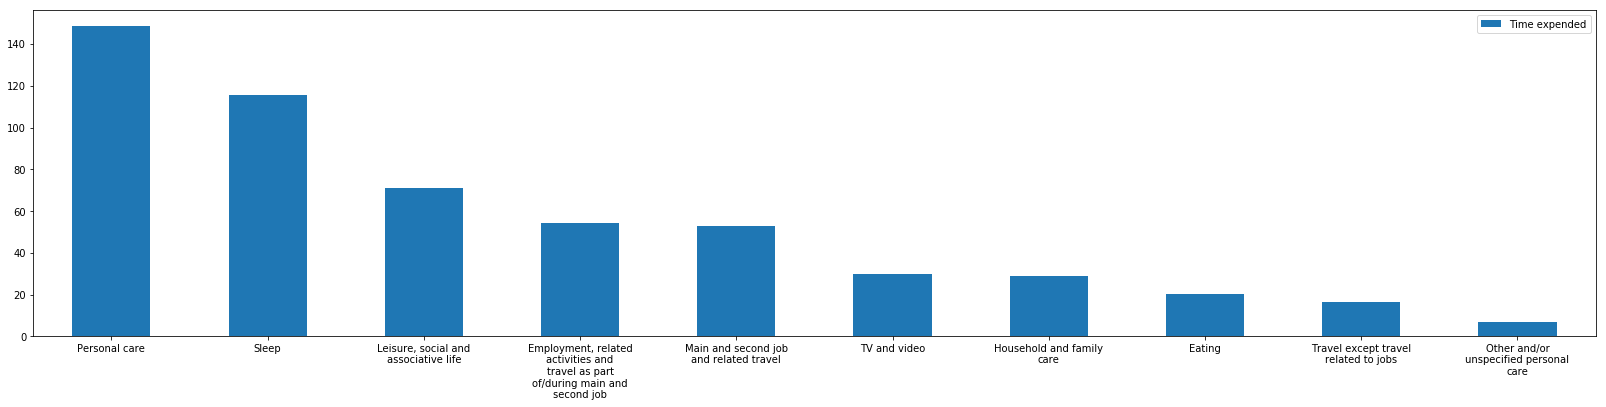

In [0]:
from textwrap import wrap
topTenTimeExpended = topTenTimeExpended.set_index(pd.Index([ '\n'.join(wrap(l, 20)) for l in topTenTimeExpended.index ]))
topTenTimeExpended.plot.bar(y='Time expended', rot=0, width=0.5, figsize=(28, 6))

2. **Indicador:** Este gráfico muestra las 10 actividades que toman mas tiempo para las mujeres en los paises europeos

In [0]:
dfActivitiesF = df[df.SEX == 'Females'][columnsData].applymap(lambda x: changeToFloat(x))
dfActivitiesF

,Personal care,Sleep,Eating,Other and/or unspecified personal care,"Employment, related activities and travel as part of/during main and second job",Main and second job and related travel,Activities related to employment and unspecified employment,Study,School and university except homework,Homework,Free time study,Household and family care,Food management except dish washing,Dish washing,Cleaning dwelling,Household upkeep except cleaning dwelling,Laundry,Ironing,Handicraft and producing textiles and other care for textiles,Gardening; other pet care,Tending domestic animals,Caring for pets,Walking the dog,Construction and repairs,Shopping and services,"Childcare, except teaching, reading and talking","Teaching, reading and talking with child",Household management and help family member,"Leisure, social and associative life",Organisational work,Informal help to other households,Participatory activities,Visiting and feasts,Other social life,Entertainment and culture,Resting,Walking and hiking,Sports and outdoor activities except walking and hiking,Computer games,Computing,Hobbies and games except computing and computer games,Reading books,"Reading, except books",TV and video,Radio and music,Unspecified leisure,Travel except travel related to jobs,Travel to/from work,Travel related to study,Travel related to shopping and services,Transporting a child,Travel related to other household purposes,"Travel related to leisure, social and associative life",Unspecified travel,Unspecified time use
14,11.11,8.34,1.50,0.47,1.53,1.52,0.01,0.16,0.06,0.06,0.04,4.10,0.57,0.20,0.26,0.28,0.09,0.19,0.06,0.10,0.00,0.03,0.03,0.04,0.33,0.16,0.07,0.10,5.06,0.03,0.00,0.03,0.37,0.24,0.11,0.31,0.11,0.07,0.02,0.09,0.09,0.08,0.16,2.13,0.03,0.01,1.22,0.15,0.02,0.18,0.04,0.00,0.16,0.27,0.02
15,11.38,9.07,1.55,0.36,2.34,2.33,0.02,0.06,0.02,0.04,0.00,5.01,1.37,0.36,0.31,0.13,0.19,0.06,0.16,0.24,0.16,0.01,0.01,0.02,0.16,0.13,0.10,0.02,3.47,0.00,0.08,0.01,0.05,0.32,0.01,0.08,0.14,0.03,0.00,0.00,0.02,0.10,0.06,2.14,0.03,0.00,0.52,0.17,0.01,0.14,0.01,0.03,0.13,0.02,0.02
16,10.58,8.15,1.46,0.56,1.56,1.53,0.03,0.13,0.04,0.04,0.04,4.14,0.49,0.21,0.39,0.15,0.13,0.10,0.07,0.13,0.01,0.04,0.04,0.03,0.38,0.16,0.09,0.12,5.15,0.07,0.09,0.04,0.19,0.49,0.14,0.20,0.15,0.12,0.02,0.06,0.16,0.08,0.30,1.40,0.04,0.00,1.19,0.13,0.02,0.19,0.04,0.04,0.33,0.03,0.05
17,10.30,8.26,1.12,0.53,3.05,3.02,0.03,0.07,0.02,0.03,0.02,4.53,1.19,0.25,0.34,0.14,0.14,0.07,0.14,0.19,0.06,0.02,0.05,0.03,0.29,0.25,0.10,0.06,4.18,0.01,0.12,0.02,0.04,0.27,0.04,0.17,0.10,0.05,0.00,0.01,0.05,0.17,0.20,2.06,0.06,0.00,1.02,0.20,0.01,0.16,0.03,0.03,0.18,0.01,0.05
18,11.05,8.32,1.44,0.49,2.06,2.05,0.01,0.20,0.06,0.07,0.06,4.55,1.20,0.29,0.50,0.11,0.11,0.12,0.10,0.03,0.01,0.01,0.02,0.01,0.35,0.25,0.05,0.19,4.26,0.01,0.12,0.05,0.16,0.34,0.06,0.26,0.32,0.06,0.00,0.03,0.05,0.04,0.08,1.46,0.02,0.00,1.05,0.18,0.03,0.12,0.06,0.01,0.24,0.01,0.02
19,11.53,8.55,2.11,0.46,2.17,2.16,0.01,0.14,0.08,0.05,0.01,4.34,1.01,0.25,0.58,0.07,0.07,0.15,0.08,0.09,0.02,0.05,0.00,0.04,0.41,0.20,0.08,0.04,4.05,0.01,0.09,0.05,0.24,0.20,0.05,0.06,0.17,0.06,0.00,0.02,0.11,0.01,0.22,1.55,0.02,0.00,0.54,0.15,0.01,0.00,0.05,0.00,0.00,0.32,0.03
20,11.12,8.19,1.52,1.01,1.52,1.50,0.02,0.14,0.04,0.09,0.01,5.20,1.19,0.35,1.24,0.06,0.10,0.20,0.08,0.06,0.01,0.01,0.02,0.01,0.36,0.18,0.10,0.05,4.06,0.01,0.13,0.08,0.26,0.23,0.04,0.31,0.17,0.06,0.00,0.02,0.05,0.06,0.10,1.29,0.03,0.00,1.14,0.15,0.02,0.17,0.06,0.01,0.27,0.06,0.03
21,10.53,8.44,1.26,0.43,3.29,3.26,0.04,0.12,0.07,0.04,0.01,3.56,1.06,0.22,0.27,0.15,0.09,0.03,0.09,0.20,0.06,0.02,0.04,0.01,0.21,0.14,0.07,0.08,4.08,0.00,0.11,0.03,0.24,0.11,0.04,0.20,0.15,0.06,0.00,0.01,0.04,0.13,0.16,1.55,0.04,0.00,1.20,0.24,0.03,0.20,0.03,0.06,0.23,0.01,0.03
22,10.56,8.35,1.26,0.56,3.31,3.29,0.02,0.10,0.05,0.03,0.02,4.29,1.18,0.22,0.38,0.21,0.11,0.04,0.11,0.15,0.17,0.02,0.02,0.02,0.21,0.16,0.09,0.01,3.45,0.00,0.11,0.04,0.22,0.10,0.02,0.13,0.08,0.05,0.00,0.02,0.02,0.10,0.13,1.59,0.04,0.00,1.05,0.20,0.02,0.19,0.01

In [0]:
timeExpendedF = dfActivitiesF.sum().to_frame()
timeExpendedF.columns = ['Time expended']
topTenTimeExpendedF = timeExpendedF.nlargest(10, 'Time expended')
topTenTimeExpendedF

,Time expended
Personal care,150.59
Sleep,116.96
"Leisure, social and associative life",61.47
Household and family care,59.91
"Employment, related activities and travel as part of/during main and second job",32.35
Main and second job and related travel,32.09
TV and video,24.14
Eating,19.47
Travel except travel related to jobs,14.44
Food management except dish washing,13.45


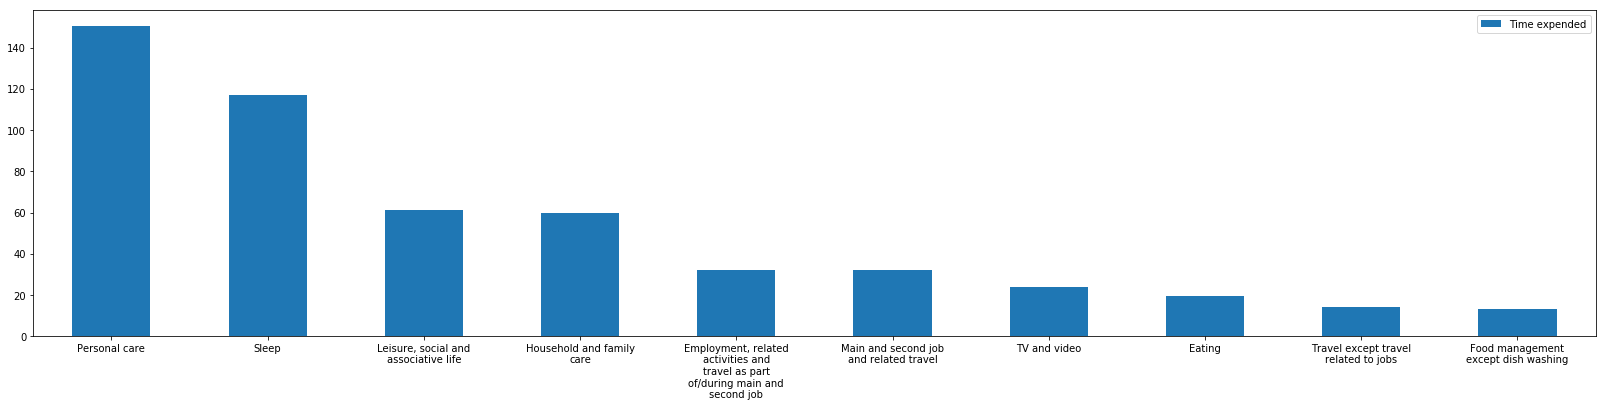

In [0]:
topTenTimeExpendedF = topTenTimeExpendedF.set_index(pd.Index([ '\n'.join(wrap(l, 20)) for l in topTenTimeExpendedF.index ]))
topTenTimeExpendedF.plot.bar(y='Time expended', rot=0, width=0.5, figsize=(28, 6))

3. **Indicador:** Este gráfico muestra las 10 diez paises europeos en donde los hombres toman mas tiempo en su cuidado personal

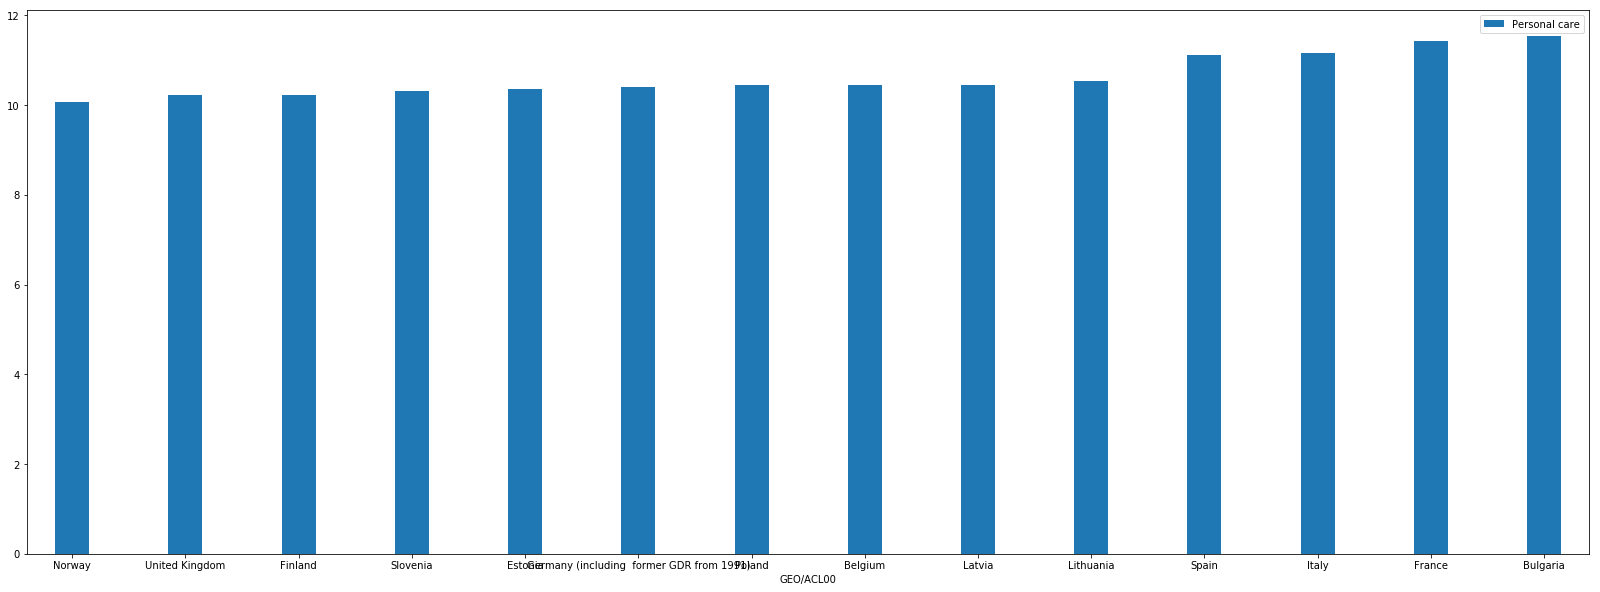

In [0]:
dfActivitiesM = df[df.SEX == 'Males'][columnsData].applymap(lambda x: changeToFloat(x)).set_index(df[df.SEX == 'Males']['GEO/ACL00'])['Personal care'].to_frame().sort_values(by=['Personal care'])
dfActivitiesM.plot.bar(y='Personal care', rot=0, width=0.3, figsize=(28, 10))